### Plots for windows - annotation per subject

In [1]:
import mne
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from tqdm import tqdm
import pprint

pp = pprint.PrettyPrinter(indent=2)


In [2]:
# load mats (for scopolamine dataset)
def load_mats(path, info, classification, dataset, descriptions):
    raws, desc = [], []

    mats = os.listdir(path)
    for i, mat in enumerate(mats):
        print(mat)
        # select columns 3 and 4 (Fpz-Cz, and Pz-Oz respectively) and convert to microvolts
        # x = loadmat(path + mat)['RawSignal'][:, [2,3]].T / 1000000
        raw = mne.io.read_raw_fif(path+mat)
            
        # subject
        subject = int(mat.split('.')[1][2:])
        # recording (occasion)
        recording = int(mat.split('.')[-2].split('M')[0][1:])
        # treatment period
        treatment_period = int(mat.split('.')[-2].split('M')[-1])

        # if even (not placebo)
        # if not recording&1:
        raws += [raw]
        desc += [{'subject': subject, 'recording': recording, 'treatment_period': treatment_period, 'raw': path+mat}]
            

    dataset += raws
    descriptions += desc

    return dataset, descriptions

# load scopolamine data
def load_scopolamine_data(sfreq, low_cut_hz, high_cut_hz, n_jobs, window_size_samples):
    print(':: loading SCOPOLAMINE data')

    # 11 measurements times from 0.5 hrs to 8.5 hrs after Scopolamine (or placebo) administration
    # m01 = 'data/scopolamine/M01/'
    m01 = '/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/'
    # m05 = 'data/scopolamine_converted_1e5/M05/'
    m05 = '/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/'
    # m11 = 'data/scopolamine_converted_1e5/M11/'
    m11 = '/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/'

    dataset, descriptions = [], []
    info = mne.create_info(ch_names=['Fpz-cz', 'Pz-Oz'], ch_types=['eeg']*2, sfreq=1012)

    dataset, descriptions = load_mats(m01, info, 'm01', dataset, descriptions)
    dataset, descriptions = load_mats(m05, info, 'm05', dataset, descriptions)
    dataset, descriptions = load_mats(m11, info, 'm11', dataset, descriptions)

    return dataset, descriptions

In [3]:
dataset, descriptions = load_scopolamine_data(sfreq=100, low_cut_hz=0.5, high_cut_hz=30, n_jobs=1, window_size_samples=500)

:: loading SCOPOLAMINE data
CHDR0507.S1001.06MAR06_0911.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.06MAR06_0911.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.


<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.06MAR06_0911.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)


CHDR0507.S1001.13FEB06_0903.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.13FEB06_0903.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.20FEB06_0926.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.20FEB06_0926.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.27FEB06_0856.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.27FEB06_0856.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1002.13FEB06_0934.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1002.13FEB06_0934.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.13FEB06_0903.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.20FEB06_0926.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1002.20FEB06_0914.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1002.20FEB06_0914.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.20FEB06_0856.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1003.20FEB06_0856.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.27FEB06_0846.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1003.27FEB06_0846.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.06MAR06_0916.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1004

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1002.20FEB06_0914.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1003.20FEB06_0856.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.20FEB06_0922.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1004.20FEB06_0922.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.21FEB06_0911.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1008.21FEB06_0911.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.28FEB06_0947.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1008.28FEB06_0947.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1009.07MAR06_0945.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1009

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1004.20FEB06_0922.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1008.21FEB06_0911.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.14FEB06_0904.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1010.14FEB06_0904.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.21FEB06_0858.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1010.21FEB06_0858.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.28FEB06_0856.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1010.28FEB06_0856.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.07MAR06_0932.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1011

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1010.07MAR06_0906.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1010.14FEB06_0904.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.21FEB06_0926.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1011.21FEB06_0926.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.07MAR06_0933.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1012.07MAR06_0933.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.14MAR06_0951.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1012.14MAR06_0951.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.21FEB06_0922.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1012.21FEB06_0922.O01M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1011.21FEB06_0926.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1012.07MAR06_0933.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.28FEB06_0928.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1012.28FEB06_0928.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.01MAR06_0916.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1013.01MAR06_0916.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.08MAR06_0857.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1013.08MAR06_0857.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.15MAR06_0927.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1013

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1012.28FEB06_0928.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1013.01MAR06_0916.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.08MAR06_0935.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1014.08MAR06_0935.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.15FEB06_0920.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1014.15FEB06_0920.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.22FEB06_0934.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1014.22FEB06_0934.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.06MAR06_0911.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1005

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1014.08MAR06_0935.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1014.15FEB06_0920.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.27FEB06_0920.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1005.27FEB06_0920.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.06MAR06_0937.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1006.06MAR06_0937.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.13FEB06_1016.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1006.13FEB06_1016.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.20FEB06_0857.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1006

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1005.27FEB06_0920.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1006.06MAR06_0937.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.07MAR06_0916.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1007.07MAR06_0916.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.14FEB06_0858.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1007.14FEB06_0858.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.21FEB06_0846.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1007.21FEB06_0846.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.28FEB06_0855.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1007.28FEB06_0855.O03M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1007.07MAR06_0916.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1007.14FEB06_0858.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.27FEB06_0907.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1004.27FEB06_0907.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.14FEB06_0910.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1008.14FEB06_0910.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.28FEB06_0935.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1011.28FEB06_0935.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.01MAR06_0934.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1015

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1004.27FEB06_0907.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1008.14FEB06_0910.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1023.18APR06_0923.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1023.18APR06_0923.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.05APR06_0901.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1028.05APR06_0901.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.10MAY06_0857.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1031.10MAY06_0857.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.11MAY06_0953.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1034

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1023.18APR06_0923.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1028.05APR06_0901.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.08MAR06_0903.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1015.08MAR06_0903.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.15FEB06_0901.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1015.15FEB06_0901.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.22FEB06_0919.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1015.22FEB06_0919.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1016.03APR06_0849.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1016

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1015.08MAR06_0903.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1015.15FEB06_0901.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1016.27MAR06_0858.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1016.27MAR06_0858.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.03APR06_0900.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1017.03APR06_0900.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.10APR06_0850.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1017.10APR06_0850.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.24APR06_0854.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1017

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1016.27MAR06_0858.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1017.03APR06_0900.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1018.24APR06_0906.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1018.24APR06_0906.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1018.27MAR06_0910.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1018.27MAR06_0910.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1020.01MAY06_0904.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1020.01MAY06_0904.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1020.03APR06_0932.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1020

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1018.24APR06_0906.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1018.27MAR06_0910.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.04APR06_0856.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1022.04APR06_0856.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.11APR06_0857.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1022.11APR06_0857.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.18APR06_0902.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1022.18APR06_0902.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.28MAR06_0852.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1022

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1022.04APR06_0856.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1022.11APR06_0857.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1023.28MAR06_0903.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1023.28MAR06_0903.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.04APR06_0926.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1024.04APR06_0926.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.11APR06_0907.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1024.11APR06_0907.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.28MAR06_0926.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1024

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1023.28MAR06_0903.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1024.04APR06_0926.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Ready.
CHDR0507.S1025.18APR06_0920.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1025.18APR06_0920.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1025.28MAR06_0843.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1025.28MAR06_0843.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.04APR06_0912.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1026.04APR06_0912.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.11APR06_0940.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1026.11APR06_0940.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =   

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1025.18APR06_0920.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1025.28MAR06_0843.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1026.28MAR06_0946.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1026.28MAR06_0946.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.12APR06_0926.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1028.12APR06_0926.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.19APR06_0927.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1028.19APR06_0927.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.29MAR06_0857.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1028.29MAR06_0857.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1026.28MAR06_0946.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1028.12APR06_0926.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1029.19APR06_0901.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1029.19APR06_0901.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1029.29MAR06_0941.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1029.29MAR06_0941.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.05APR06_0847.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1030.05APR06_0847.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.12APR06_0900.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1030.12APR06_0900.O03M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1029.19APR06_0901.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1029.29MAR06_0941.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.07JUN06_0853.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1031.07JUN06_0853.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.14JUN06_0851.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1031.14JUN06_0851.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.17MAY06_0906.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1031.17MAY06_0906.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.10MAY06_0848.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1032.10MAY06_0848.O01M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1031.07JUN06_0853.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1031.14JUN06_0851.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.31MAY06_0854.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1032.31MAY06_0854.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.10MAY06_1021.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1033.10MAY06_1021.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.17MAY06_0912.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1033.17MAY06_0912.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.24MAY06_0907.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1033

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1032.31MAY06_0854.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1033.10MAY06_1021.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.08JUN06_0906.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1034.08JUN06_0906.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.18MAY06_0919.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1034.18MAY06_0919.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.01JUN06_0934.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1035.01JUN06_0934.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.08JUN06_0918.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1035

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1034.08JUN06_0906.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1034.18MAY06_0919.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.18MAY06_0856.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1035.18MAY06_0856.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1036.01JUN06_0915.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1036.01JUN06_0915.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1036.08JUN06_0912.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1036.08JUN06_0912.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1036.11MAY06_0933.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1036

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1035.18MAY06_0856.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1036.01JUN06_0915.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1038.08JUN06_0848.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1038.08JUN06_0848.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.11MAY06_0928.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1038.11MAY06_0928.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1039.01JUN06_0937.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1039.01JUN06_0937.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1039.08JUN06_0903.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1039.08JUN06_0903.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1038.08JUN06_0848.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1038.11MAY06_0928.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.12MAY06_0933.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1041.12MAY06_0933.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.19MAY06_0915.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1041.19MAY06_0915.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.26MAY06_0955.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1041.26MAY06_0955.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.02JUN06_0917.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1042

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1041.12MAY06_0933.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1041.19MAY06_0915.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.26MAY06_0943.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1042.26MAY06_0943.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.02JUN06_0912.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1043.02JUN06_0912.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.12MAY06_0910.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1043.12MAY06_0910.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.19MAY06_0900.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1043

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1042.26MAY06_0943.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1043.02JUN06_0912.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.12MAY06_0908.O01M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1044.12MAY06_0908.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.19MAY06_0911.O02M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1044.19MAY06_0911.O02M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.26MAY06_0943.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1044.26MAY06_0943.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.02JUN06_0911.O04M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1045

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1044.12MAY06_0908.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1044.19MAY06_0911.O02M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.26MAY06_0931.O03M01.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1045.26MAY06_0931.O03M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.06MAR06_1237.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1001.06MAR06_1237.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.13FEB06_1343.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1001.13FEB06_1343.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.20FEB06_1248.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1001

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1045.26MAY06_0931.O03M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1001.06MAR06_1237.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1002.20FEB06_1244.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1002.20FEB06_1244.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1002.27FEB06_1252.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1002.27FEB06_1252.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.06MAR06_1202.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.06MAR06_1202.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.13FEB06_1211.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1002.20FEB06_1244.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1002.27FEB06_1252.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.20FEB06_1209.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.20FEB06_1209.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.27FEB06_1223.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.27FEB06_1223.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.06MAR06_1159.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1004.06MAR06_1159.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.20FEB06_1216.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1004

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.20FEB06_1209.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.27FEB06_1223.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.06MAR06_1202.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1005.06MAR06_1202.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.13FEB06_1225.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1005.13FEB06_1225.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.20FEB06_1209.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1005.20FEB06_1209.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.27FEB06_1222.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1005

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1004.27FEB06_1218.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1005.06MAR06_1202.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.20FEB06_1249.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1006.20FEB06_1249.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.27FEB06_1304.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1006.27FEB06_1304.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.07MAR06_1203.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1007.07MAR06_1203.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.14FEB06_1151.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1007

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1006.20FEB06_1249.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1006.27FEB06_1304.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.14FEB06_1247.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1008.14FEB06_1247.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.21FEB06_1216.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1008.21FEB06_1216.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.28FEB06_1239.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1008.28FEB06_1239.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1009.07MAR06_1222.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1009

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1008.14FEB06_1247.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1008.21FEB06_1216.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1009.28FEB06_1203.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1009.28FEB06_1203.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.07MAR06_1206.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.07MAR06_1206.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.14FEB06_1157.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.14FEB06_1157.O01M05.fif...
Isotrak not found


<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1009.28FEB06_1203.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.07MAR06_1206.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.21FEB06_1141.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.21FEB06_1141.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.28FEB06_1152.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.28FEB06_1152.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.14FEB06_1226.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1011.14FEB06_1226.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.21FEB06_1226.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1011.21FEB06_1226.O02M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.21FEB06_1141.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1010.28FEB06_1152.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.14MAR06_1150.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1012.14MAR06_1150.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.21FEB06_1227.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1012.21FEB06_1227.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.28FEB06_1226.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1012.28FEB06_1226.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.01MAR06_1209.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1013

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1012.14MAR06_1150.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1012.21FEB06_1227.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.22FEB06_1132.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1013.22FEB06_1132.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.01MAR06_1242.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1014.01MAR06_1242.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.13FEB06_1223.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1004.13FEB06_1223.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.28FEB06_1153.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1007

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1013.22FEB06_1132.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1014.01MAR06_1242.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.24APR06_1155.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.24APR06_1155.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.28MAR06_1204.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1022.28MAR06_1204.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.04APR06_1220.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1026.04APR06_1220.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.12APR06_1132.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1030

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.24APR06_1155.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1022.28MAR06_1204.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1036.18MAY06_1116.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1036.18MAY06_1116.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.12MAY06_1213.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.12MAY06_1213.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.15FEB06_1241.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1014.15FEB06_1241.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.22FEB06_1216.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1014.22FEB06_1216.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1036.18MAY06_1116.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.12MAY06_1213.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1015.08MAR06_1211.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1015.08MAR06_1211.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.15FEB06_1247.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1015.15FEB06_1247.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.22FEB06_1214.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1015.22FEB06_1214.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1016.03APR06_1215.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1016.03APR06_1215.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1015.08MAR06_1211.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1015.15FEB06_1247.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.03APR06_1216.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.03APR06_1216.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.10APR06_1211.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.10APR06_1211.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.27MAR06_1206.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.27MAR06_1206.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1018.03APR06_1254.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1018

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.03APR06_1216.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1017.10APR06_1211.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Ready.
CHDR0507.S1018.27MAR06_1244.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1018.27MAR06_1244.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1020.01MAY06_1145.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1020.01MAY06_1145.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1020.03APR06_1250.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1020.03APR06_1250.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1020.10APR06_1238.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1020.10APR06_1238.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =   

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1018.27MAR06_1244.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1020.01MAY06_1145.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.11APR06_1133.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1022.11APR06_1133.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.18APR06_1207.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1022.18APR06_1207.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1023.04APR06_1242.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1023.04APR06_1242.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1023.11APR06_1208.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1023

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1022.11APR06_1133.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1022.18APR06_1207.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.04APR06_1145.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1024.04APR06_1145.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.11APR06_1140.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1024.11APR06_1140.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.18APR06_1156.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1024.18APR06_1156.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.28MAR06_1207.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1024

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1024.04APR06_1145.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1024.11APR06_1140.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1025.18APR06_1200.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1025.18APR06_1200.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1025.28MAR06_1200.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1025.28MAR06_1200.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.11APR06_1208.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1026.11APR06_1208.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.18APR06_1233.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1026.18APR06_1233.O04M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1025.18APR06_1200.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1025.28MAR06_1200.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.12APR06_1130.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1028.12APR06_1130.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.19APR06_1144.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1028.19APR06_1144.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.29MAR06_1151.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1028.29MAR06_1151.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1029.05APR06_1224.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1029.05APR06_1224.O02M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1028.12APR06_1130.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1028.19APR06_1144.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.05APR06_1149.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1030.05APR06_1149.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.19APR06_1142.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1030.19APR06_1142.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.29MAR06_1201.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1030.29MAR06_1201.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.07JUN06_1153.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1031

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1030.05APR06_1149.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1030.19APR06_1142.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1031.17MAY06_1154.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1031.17MAY06_1154.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.10MAY06_1201.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1032.10MAY06_1201.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.17MAY06_1236.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1032.17MAY06_1236.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.24MAY06_1142.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1032.24MAY06_1142.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1031.17MAY06_1154.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1032.10MAY06_1201.O01M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.17MAY06_1201.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1033.17MAY06_1201.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.31MAY06_1146.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1033.31MAY06_1146.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.01JUN06_1226.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1034.01JUN06_1226.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.08JUN06_1215.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1034.08JUN06_1215.O04M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1033.17MAY06_1201.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1033.31MAY06_1146.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.01JUN06_1145.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1035.01JUN06_1145.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.08JUN06_1141.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1035.08JUN06_1141.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.11MAY06_1144.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1035.11MAY06_1144.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.18MAY06_1118.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1035

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1035.01JUN06_1145.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1035.08JUN06_1141.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.01JUN06_1145.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1038.01JUN06_1145.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.08JUN06_1136.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1038.08JUN06_1136.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.11MAY06_1143.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1038.11MAY06_1143.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.18MAY06_1119.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1038

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1038.01JUN06_1145.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1038.08JUN06_1136.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1039.18MAY06_1156.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1039.18MAY06_1156.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.02JUN06_1213.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1041.02JUN06_1213.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.12MAY06_1223.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1041.12MAY06_1223.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.19MAY06_1222.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1041

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1039.18MAY06_1156.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1041.02JUN06_1213.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.02JUN06_1222.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.02JUN06_1222.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.19MAY06_1216.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.19MAY06_1216.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.26MAY06_1243.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.26MAY06_1243.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.02JUN06_1141.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1043

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.02JUN06_1222.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1042.19MAY06_1216.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.19MAY06_1145.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1043.19MAY06_1145.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.26MAY06_1207.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1043.26MAY06_1207.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.02JUN06_1208.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1044.02JUN06_1208.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.12MAY06_1217.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1044

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1043.19MAY06_1145.O02M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1043.26MAY06_1207.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1044.26MAY06_1230.O03M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1044.26MAY06_1230.O03M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.02JUN06_1133.O04M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1045.02JUN06_1133.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.12MAY06_1140.O01M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1045.12MAY06_1140.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.19MAY06_1143.O02M05.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1045.19MAY06_1143.O02M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1044.26MAY06_1230.O03M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1045.02JUN06_1133.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.13FEB06_2043.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.13FEB06_2043.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.20FEB06_1948.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.20FEB06_1948.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1001.27FEB06_1956.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.27FEB06_1956.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1002.13FEB06_1947.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1002.13FEB06_1947.O01M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.13FEB06_2043.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.20FEB06_1948.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1002.27FEB06_1951.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1002.27FEB06_1951.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.06MAR06_1902.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1003.06MAR06_1902.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.13FEB06_1912.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1003.13FEB06_1912.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1003.20FEB06_1909.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1003

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1002.20FEB06_1954.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1002.27FEB06_1951.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.07MAR06_1956.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1008.07MAR06_1956.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.14FEB06_1943.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1008.14FEB06_1943.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.21FEB06_1915.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1008.21FEB06_1915.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1008.28FEB06_1940.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1008

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1008.07MAR06_1956.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1008.14FEB06_1943.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1009.21FEB06_1839.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1009.21FEB06_1839.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1009.28FEB06_1858.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1009.28FEB06_1858.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.07MAR06_1905.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1010.07MAR06_1905.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1010.14FEB06_1859.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1010.14FEB06_1859.O01M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1009.21FEB06_1839.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1009.28FEB06_1858.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.21FEB06_1931.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1011.21FEB06_1931.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.28FEB06_1939.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1011.28FEB06_1939.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.07MAR06_1943.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1012.07MAR06_1943.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.14MAR06_1849.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1012

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1011.14FEB06_1925.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1011.21FEB06_1931.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1012.28FEB06_1926.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1012.28FEB06_1926.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.01MAR06_1910.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1013.01MAR06_1910.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.08MAR06_1905.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1013.08MAR06_1905.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1013.15MAR06_1901.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1013

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1012.28FEB06_1926.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1013.01MAR06_1910.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.01MAR06_1941.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1014.01MAR06_1941.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.13FEB06_1921.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1004.13FEB06_1921.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.20FEB06_1911.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1004.20FEB06_1911.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1004.27FEB06_1919.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1004.27FEB06_1919.O03M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1014.01MAR06_1941.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1004.13FEB06_1921.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1005.20FEB06_1908.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1005.20FEB06_1908.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.06MAR06_1931.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1006.06MAR06_1931.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.13FEB06_2012.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1006.13FEB06_2012.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.20FEB06_1946.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1006

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1005.13FEB06_1921.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1005.20FEB06_1908.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1006.27FEB06_2004.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1006.27FEB06_2004.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.07MAR06_1904.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1007.07MAR06_1904.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.14FEB06_1854.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1007.14FEB06_1854.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1007.21FEB06_1851.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1007.21FEB06_1851.O02M

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1006.27FEB06_2004.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1007.07MAR06_1904.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1011.07MAR06_1943.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1011.07MAR06_1943.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.08MAR06_1943.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1014.08MAR06_1943.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.24APR06_1854.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1017.24APR06_1854.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.28MAR06_1904.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1022

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1011.07MAR06_1943.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1014.08MAR06_1943.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.24MAY06_1916.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1033.24MAY06_1916.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1036.18MAY06_1817.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1036.18MAY06_1817.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.02JUN06_1920.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1042.02JUN06_1920.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1014.15FEB06_1941.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1014

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1033.24MAY06_1916.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1036.18MAY06_1817.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.01MAR06_1948.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1015.01MAR06_1948.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.08MAR06_1913.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1015.08MAR06_1913.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.15FEB06_1941.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1015.15FEB06_1941.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1015.22FEB06_1913.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1015

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1015.01MAR06_1948.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1015.08MAR06_1913.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1016.24APR06_1906.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1016.24APR06_1906.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1016.27MAR06_1858.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1016.27MAR06_1858.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.03APR06_1916.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1017.03APR06_1916.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1017.10APR06_1910.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1017

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1016.24APR06_1906.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1016.27MAR06_1858.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Ready.
CHDR0507.S1018.10APR06_1952.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1018.10APR06_1952.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1018.24APR06_1944.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1018.24APR06_1944.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1018.27MAR06_1942.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1018.27MAR06_1942.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1020.01MAY06_1845.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1020.01MAY06_1845.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =   

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1018.10APR06_1952.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1018.24APR06_1944.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Ready.
CHDR0507.S1020.24APR06_1928.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1020.24APR06_1928.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.04APR06_1841.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1022.04APR06_1841.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.11APR06_1835.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1022.11APR06_1835.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1022.18APR06_1857.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1022.18APR06_1857.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =   

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1020.24APR06_1928.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1022.04APR06_1841.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1023.18APR06_1934.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1023.18APR06_1934.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1023.28MAR06_1941.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1023.28MAR06_1941.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.04APR06_1846.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1024.04APR06_1846.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1024.11APR06_1832.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1024

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1023.18APR06_1934.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1023.28MAR06_1941.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1024.28MAR06_1907.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1024.28MAR06_1907.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1025.04APR06_1852.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1025.04APR06_1852.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1025.11APR06_1904.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1025.11APR06_1904.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1025.18APR06_1901.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1025.18APR06_1901.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1024.28MAR06_1907.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1025.04APR06_1852.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1026.11APR06_1906.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1026.11APR06_1906.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.18APR06_1931.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1026.18APR06_1931.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1026.28MAR06_1949.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1026.28MAR06_1949.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.05APR06_1850.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1028.05APR06_1850.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1026.11APR06_1906.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1026.18APR06_1931.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1028.29MAR06_1858.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1028.29MAR06_1858.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1029.05APR06_1926.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1029.05APR06_1926.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1029.12APR06_1827.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1029.12APR06_1827.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1029.19APR06_1929.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1029

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1028.29MAR06_1858.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1029.05APR06_1926.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

CHDR0507.S1030.05APR06_1848.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1030.05APR06_1848.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.19APR06_1845.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1030.19APR06_1845.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1030.29MAR06_1856.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1030.29MAR06_1856.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.07JUN06_1855.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1031.07JUN06_1855.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.00

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1030.05APR06_1848.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1030.19APR06_1845.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1031.17MAY06_1855.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1031.17MAY06_1855.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.10MAY06_1914.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1032.10MAY06_1914.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.17MAY06_1938.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1032.17MAY06_1938.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1032.24MAY06_1846.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1032

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1031.17MAY06_1855.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1032.10MAY06_1914.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.17MAY06_1904.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1033.17MAY06_1904.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1033.31MAY06_1845.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1033.31MAY06_1845.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.01JUN06_1933.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1034.01JUN06_1933.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1034.08JUN06_1854.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1034

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1033.17MAY06_1904.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1033.31MAY06_1845.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.01JUN06_1845.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1035.01JUN06_1845.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.08JUN06_1840.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1035.08JUN06_1840.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.11MAY06_1843.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1035.11MAY06_1843.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1035.18MAY06_1818.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1035

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1035.01JUN06_1845.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1035.08JUN06_1840.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.01JUN06_1845.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1038.01JUN06_1845.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.08JUN06_1836.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1038.08JUN06_1836.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.11MAY06_1843.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1038.11MAY06_1843.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1038.18MAY06_1821.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1038

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1038.01JUN06_1845.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1038.08JUN06_1836.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1039.08JUN06_1909.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1039.08JUN06_1909.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1039.11MAY06_1917.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1039.11MAY06_1917.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1039.18MAY06_1857.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1039.18MAY06_1857.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.02JUN06_1914.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1041

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1039.01JUN06_1920.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1039.08JUN06_1909.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1041.26MAY06_1942.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1041.26MAY06_1942.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.12MAY06_1917.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1042.12MAY06_1917.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.19MAY06_1915.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1042.19MAY06_1915.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1042.26MAY06_1950.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1042

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1041.19MAY06_1951.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1041.26MAY06_1942.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1043.26MAY06_1912.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1043.26MAY06_1912.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.02JUN06_1908.O04M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1044.02JUN06_1908.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.12MAY06_1916.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1044.12MAY06_1916.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1044.19MAY06_1922.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1044

<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1043.26MAY06_1912.O03M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1044.02JUN06_1908.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

Ready.
CHDR0507.S1045.12MAY06_1839.O01M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1045.12MAY06_1839.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.19MAY06_1845.O02M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1045.19MAY06_1845.O02M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
CHDR0507.S1045.26MAY06_1908.O03M11.fif
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1045.26MAY06_1908.O03M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.


<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1045.12MAY06_1839.O01M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1045.19MAY06_1845.O02M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path+mat)
<ipython-input-2-3ab4b5c6a6cf>:10: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/sco

In [4]:
df = pd.DataFrame(descriptions).groupby(['subject','treatment_period']).min().head(15)
df

recording  \
subject treatment_period              
1       1                         1   
        5                         1   
        11                        1   
2       1                         1   
        5                         1   
        11                        1   
3       1                         2   
        5                         1   
        11                        1   
4       1                         1   
        5                         1   
        11                        1   
5       1                         1   
        5                         1   
        11                        1   

                                                                        raw  
subject treatment_period                                                     
1       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
2       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
3       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
4       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...  
5       1                 /media/maligan/My Passport/msc_thesis/data/sco...  
        5                 /media/maligan/My Passport/msc_thesis/data/sco...  
        11                /media/maligan/My Passport/msc_thesis/data/sco...

In [30]:
raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]

Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.06MAR06_0911.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1001.06MAR06_1237.O04M05.fif...


<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1001.06MAR06_0911.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1001.06MAR06_1237.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]


Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.06MAR06_1940.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1002.13FEB06_0934.O01M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1002.13FEB06_1249.O01M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1002.13FEB06_1947.O01M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passpor

<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1001.06MAR06_1940.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1002.13FEB06_0934.O01M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning:

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.06MAR06_1202.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1003.06MAR06_1902.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1004.06MAR06_0916.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1004.06MAR06_1159.O04M05.fif...


<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1003.06MAR06_1202.O04M05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1003.06MAR06_1902.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning:

Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1004.06MAR06_1901.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1005.06MAR06_0911.O04M01.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M05/CHDR0507.S1005.06MAR06_1202.O04M05.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.
Opening raw data file /media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1005.06MAR06_1906.O04M11.fif...
Isotrak not found
    Range : 0 ... 64767 =      0.000 ...    63.999 secs
Ready.


<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M11/CHDR0507.S1004.06MAR06_1901.O04M11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning: This filename (/media/maligan/My Passport/msc_thesis/data/scopolamine_converted_1e5/M01/CHDR0507.S1005.06MAR06_0911.O04M01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws = [mne.io.read_raw_fif(df.iloc[i,1]) for i in range(len(df))]
<ipython-input-30-afb7cd106dd4>:1: RuntimeWarning:

In [6]:
cols = 3
rows = int(len(df)/cols)
# fig = plt.figure()

plt.rc('font', size=12) 

_, axes = plt.subplots(rows, 3, figsize=(60, 15))

# fig, axes = plt.subplots(len(df))

for i, ax in enumerate(axes.ravel()):
    raws[i].plot(show=False, duration=5, start=15, show_scrollbars=False)
    ax.set_title('Scopolamine Sample EEG Traces')

    file_name = f'./tf_plots/trace_{i}.png'

    plt.savefig(file_name)
    plt.close()


In [7]:
fig, axes = plt.subplots(rows, cols, figsize=(60, 60))

i = 0 
for x in range(rows):
    for y in range(cols):
        file_name = f'./tf_plots/trace_{i}.png'
        img = cv2.imread(file_name)

        plt.imshow(img)
        plt.tight_layout()
        axes[x,y].imshow(img)
        axes[x,y].set_axis_off()

        i += 1

plt.savefig('./tf_plots/traces.jpg')
plt.close()

### TF plots

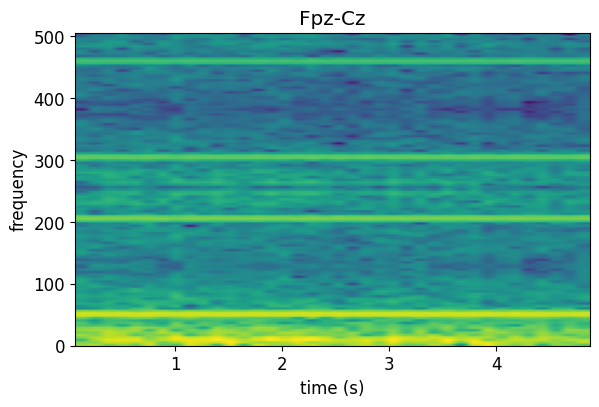

In [186]:
# single channel (Fpz-Cz)

plt.close()

plt.rc('font', size=12)
plt.rc('')

# get data (5s - start 15s)
signal = raw.get_data()[0][15000:20000]

# Plot the signal read from wav file
fig, axes = plt.subplots(1, 1, figsize=(6,4))
plt.title('TF plots')
plt.tight_layout()

axes.set_title('Fpz-Cz')
axes.specgram(signal, Fs=raw.info['sfreq'])
axes.set(xlabel='time (s)', ylabel='frequency')

plt.show()

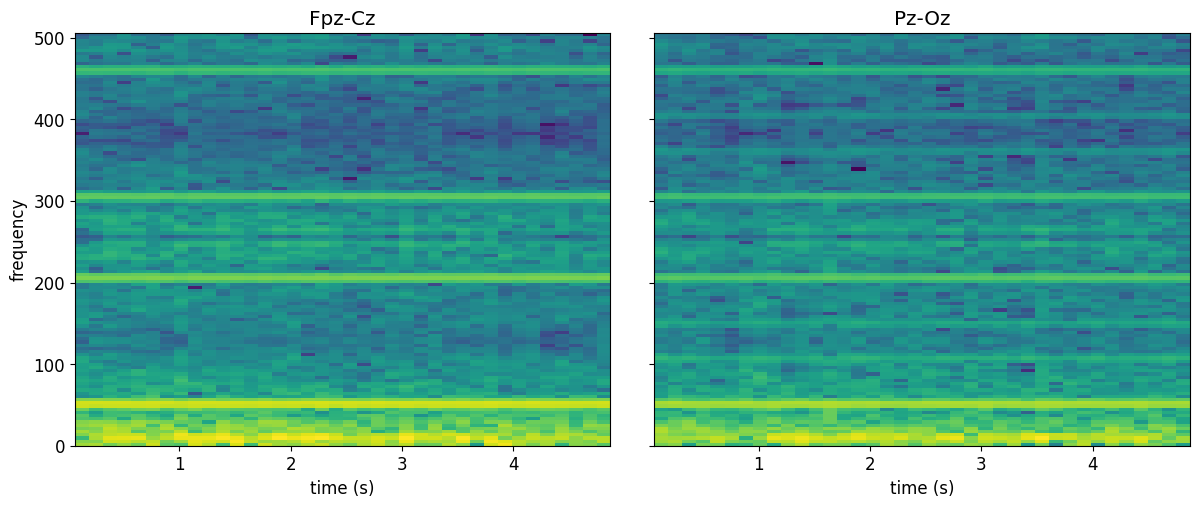

In [172]:
# horizontal

plt.close()

plt.rc('font', size=12)
plt.rc('')

# get data (5s - start 15s)
signal_c1 = raw.get_data()[0][15000:20000]
signal_c2 = raw.get_data()[1][15000:20000]

# Plot the signal read from wav file
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
plt.title('TF plots')
plt.tight_layout()

# axes[0].plot(signal)
# axes[0].set(xlabel='sample', ylabel='amplitude')
axes[0].set_title('Fpz-Cz')
axes[0].specgram(signal_c1, Fs=raw.info['sfreq'])
axes[0].set(xlabel='time (s)', ylabel='frequency')

axes[1].set_title('Pz-Oz')
axes[1].specgram(signal_c2, Fs=raw.info['sfreq'])
axes[1].set(xlabel='time (s)')

plt.show()

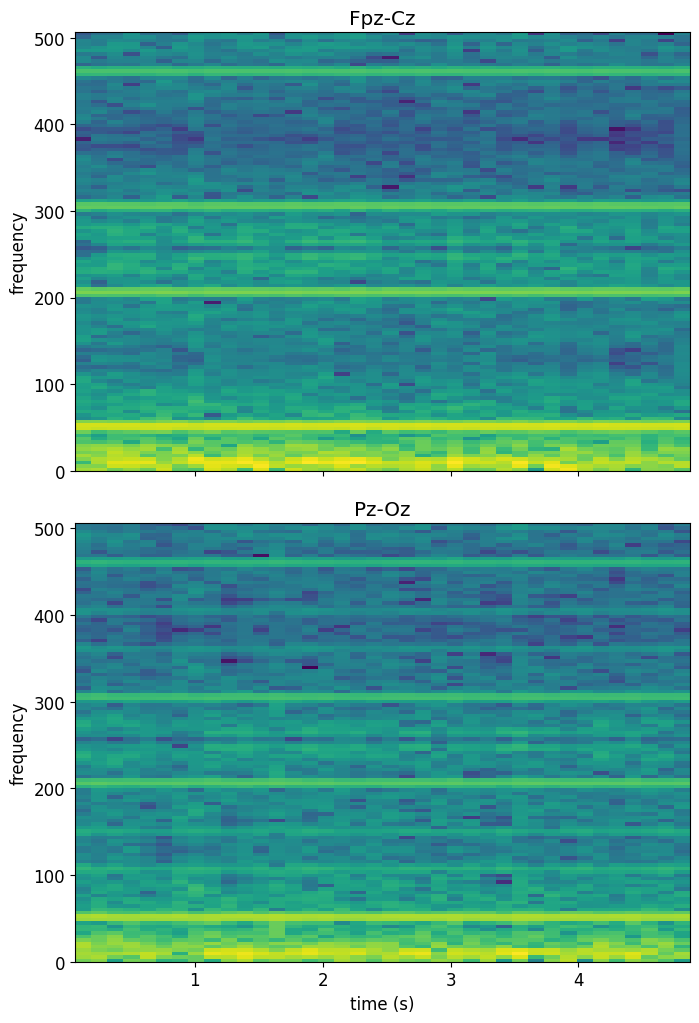

In [173]:
#vertical

plt.close()

plt.rc('font', size=12)
plt.rc('')

# get data (5s - start 15s)
signal_c1 = raw.get_data()[0][15000:20000]
signal_c2 = raw.get_data()[1][15000:20000]

# Plot the signal read from wav file
fig, axes = plt.subplots(2, 1, figsize=(7,10), sharex=True)
plt.title('TF plots')
plt.tight_layout()

# axes[0].plot(signal)
# axes[0].set(xlabel='sample', ylabel='amplitude')
axes[0].set_title('Fpz-Cz')
axes[0].specgram(signal_c1, Fs=raw.info['sfreq'])
axes[0].set(ylabel='frequency')

axes[1].set_title('Pz-Oz')
axes[1].specgram(signal_c2, Fs=raw.info['sfreq'])
axes[1].set(xlabel='time (s)', ylabel='frequency')

plt.show()

In [71]:
cols = 3
rows = int(len(df)/cols)

plt.rc('font', size=12) 
params = {
    # 'axes.labelsize': 'small',
    # 'axes.titlesize': 16,
    # 'xtick.labelsize': 'large',
    # 'ytick.labelsize': 'large',
    'axes.labelsize': 20.0,
}
plt.rcParams.update(params)

_, axes = plt.subplots(rows, 3, figsize=(60, 21))


labels = np.unique([raw.annotations[0]['description'] for raw in raws])
count = 0

for i, ax in enumerate(axes.ravel()):
    # get data (5s - start 15s)
    signal_c1 = raws[i].get_data()[0][15000:20000]
    signal_c2 = raws[i].get_data()[1][15000:20000]

    # Plot the signal read from wav file
    # fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
    # fig, axes = plt.subplots(2, 1, figsize=(7,10), sharex=True)
    fig, axes = plt.subplots(1, 1, figsize=(6,4))
    plt.tight_layout()

    # axes[0].set_title('Fpz-Cz')
    # axes[0].specgram(signal_c1, Fs=raws[i].info['sfreq'])
    # axes[0].set(xlabel='time (s)', ylabel='frequency')

    # axes[1].set_title('Pz-Oz')
    # axes[1].specgram(signal_c2, Fs=raws[i].info['sfreq'])
    # axes[1].set(xlabel='time (s)')


    # axes[0].set_title('Fpz-Cz')
    # axes[0].specgram(signal_c1, Fs=raw.info['sfreq'])
    # axes[0].set(ylabel='frequency')

    # axes[1].set_title('Pz-Oz')
    # axes[1].specgram(signal_c2, Fs=raw.info['sfreq'])
    # axes[1].set(xlabel='time (s)', ylabel='frequency')

    # axes.set_title('Fpz-Cz')
    axes.specgram(signal_c1, Fs=raws[i].info['sfreq'])
    # axes.set(xlabel='time (s)')


    # plt.set_title('Scopolamine Sample Time-Frequency Plots')

    file_name = f'./tf_plots/tf_plots_{i}.png'

    # axes
    if i < 3:
        axes.set_title(labels[i])
    # x-labels
    elif rows*cols - i <= cols:
        axes.set(xlabel=f'time (s)')
    else:
        axes.set(xlabel=f' ')
    # y-labels
    if i%cols == 0:
        count += 1
        axes.set(ylabel=f'subject #{count}')


    plt.savefig(file_name, bbox_inches="tight")
    plt.close()


In [34]:
plt.close()



fig, axes = plt.subplots(rows, cols, figsize=(60, 60))

# params = {
    # 'axes.labelsize': 30,
    # 'axes.titlesize': 30,
    # 'xtick.labelsize': 'large',
    # 'ytick.labelsize': 'large'
    # 'figure.titlesize': 'large',
# }
# plt.rcParams.update(params)
plt.rc('font', size=26)
# plt.rcParams['axes.labelsize'] = 26

i = 0 
for x in range(rows):
    for y in range(cols):
        file_name = f'./tf_plots/tf_plots_{i}.png'
        img = cv2.imread(file_name)
        # convert from read BGR to RGB
        img = np.flip(img, axis=-1)
        # plt.tight_layout()
        # plt.imshow(img)
        
        axes[x,y].imshow(img)
        axes[x,y].set_axis_off()

        i += 1

# setting labels and axes
# labels = np.unique([raw.annotations[0]['description'] for raw in raws])
# for c in range(cols):
#     axes[0,c].set_title(labels[c])

# for r in range(rows):
#     axes[r, 0].set(ylabel=f'subject #{y}')

# fig.suptitle('Scopolamine Time-Frequency Plots', fontsize=20)

fig.subplots_adjust(top=0.5)
# plt.text(x=0.5, y=0.94, s="My title 1", fontsize=25, ha="center")
fig.tight_layout()


# params = {
#     'figure.titlesize': 'large',
# }
# plt.rcParams.update(params)

fig.savefig('./tf_plots/tf_plots.jpg', bbox_inches="tight")
plt.close()

In [153]:
# from skimage import util

# M = 500
# signal = raw.get_data()[1]

# sfreq = 1012
# N = signal.shape[0]
# L = N / sfreq

# slices = util.view_as_windows(signal, window_shape=(M,), step=1500)
# print(f'Audio shape: {signal.shape}, Sliced audio shape: {slices.shape}')

# win = np.hanning(M + 1)[:-1]
# slices = slices * win
# slices = slices.T
# print('Shape of `slices`:', slices.shape)

# spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
# spectrum = np.abs(spectrum)

# S = np.abs(spectrum)
# S = 20 * np.log10(S / np.max(S))

# f, ax = plt.subplots(figsize=(20,10))
# ax.imshow(S, origin='lower', cmap='viridis',
#           extent=(0, L, 0, sfreq / 2 / 1000))
# ax.axis('tight')
# ax.set_ylabel('Frequency [kHz]')
# ax.set_xlabel('Time [s]')
# plt.show()